## Исследование данных о российском кинопрокате



В данном проекте нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Особое внимание уделим фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Посмотрим, сколько объектов в исходном датафрейме, чтобы понять, не потеряем ли мы данные при объединении.

In [4]:
df['puNumber'] = pd.to_numeric(df['puNumber'], errors='coerce')#приведем данные к одному типу, для слияния
df = df.merge(df_shows, on='puNumber', how='left')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [6]:
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013.0,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614.0,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416.0,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114.0,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Прекрасно, данные потеряны не были.

Видим в данных большее количество пропусков, и столбцы, где стоит изменить тип данных. Приступим.

### Шаг 2. Предобработка данных

In [7]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')#приведем значение рейтинга к числовому типу

In [8]:
df = df.dropna(subset=['puNumber'])

Мы можем заполнить пропуски в *ratings*, и всеми столбцами связанными с бюджетом и государственной поддержкой, однако я не стал это делать, т.к. заполнять средним или медианой их не совсем правильно.

In [9]:
df.duplicated().sum()#проверяем на явные дубликаты

0

Первично оценивая данные мы видели дубликаты в них, однако видно, что даты в строках различаются, проверим как у них различаюются кассовые сборы.

In [10]:
data = df.dropna(subset=['box_office'])
display(data.head(10))
data['title'].value_counts()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013.0,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616.0,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716.0,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413.0,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213.0,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1165.0
47,Андрей Рублев.,111029814.0,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Тарковский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"драма,биография,история",22660.0
50,Асса,111005815.0,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Соловьев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,боевик",84720.0
52,Айболит - 66,111010513.0,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мюзикл,комедия,детский",1795.0
61,Американская дочь,111005515.0,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"драма,комедия",300.0
64,Аттестат зрелости,111005915.0,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Т.Лукашевич,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,драма,67500.0


Зверополис                                                     2
Зверь                                                          2
Лесной патруль                                                 2
Арктика 3D                                                     2
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    2
                                                              ..
И грянул шторм                                                 1
Альдабра: Путешествие по таинственному острову                 1
Человек, который убил Дон Кихота                               1
Мистер Олимпия                                                 1
12 месяцев. Новая сказка                                       1
Name: title, Length: 3128, dtype: int64

In [11]:
data[data['title']=='Монстры на острове']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1033,Монстры на острове,124000413.0,2013-02-21 12:00:00+00:00,Анимационный,"Аби Шуи, Хакайдо Медиа Партнерс, Джи Дрим, Роб...",Япония - Канада,Такаши Ямадзаки,Генки Хавамура,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мультфильм,фэнтези,приключения",3780.0
1034,Монстры на острове,124002515.0,2015-06-25 12:00:00+00:00,Анимационный,"Аби Шуи, Хакайдо Медиа Партнерс, Джи Дрим, Роб...",Япония - Канада,Такаши Ямадзаки,Генки Хавамура,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мультфильм,фэнтези,приключения",120.0


Видим, что кассовые сборы отличаются, поэтому будет не совсем правильно избавляться от таких дубликатов.

In [12]:
display(df['type'].value_counts())
df['type'] = df['type'].str.strip()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [13]:
display(df['genres'].value_counts())

драма                           476
комедия                         352
мелодрама,комедия               222
драма,мелодрама,комедия         189
драма,мелодрама                 183
                               ... 
комедия,драма,семейный            1
боевик,приключения,история        1
фэнтези,боевик,криминал           1
семейный,приключения,военный      1
приключения,фэнтези,семейный      1
Name: genres, Length: 742, dtype: int64

In [14]:
display(df['production_country'].value_counts())

США                                                                     2172
Россия                                                                  1820
СССР                                                                     347
Франция                                                                  301
Великобритания                                                           257
                                                                        ... 
Швеция - Германия - Франция - Норвегия                                     1
Великобритания-Германия-Канада-ЮАР                                         1
США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция       1
Ирландия - США                                                             1
Великобритания - Ирландия - США                                            1
Name: production_country, Length: 950, dtype: int64

В большинстве столбцов с категоральными переменными встречается одна и та же проблема - различное форматирование.

In [15]:
df.loc[~(df['budget'].isna()),['refundable_support','nonrefundable_support','budget']].head(10)

,refundable_support,nonrefundable_support,budget
1281,0.0,26500000.0,79411900.0
1448,0.0,26000000.0,37142857.0
1498,0.0,107847945.0,176023490.0
1524,0.0,28000000.0,40574140.0
1792,0.0,25000000.0,40015122.0
1854,0.0,25000000.0,51850000.0
1870,50000000.0,100000000.0,220588394.0
1871,0.0,46502299.0,86210067.0
1903,0.0,75000000.0,139551503.0
1912,0.0,34000000.0,48571430.0


Видим, что в некоторых строках отсутствуют значения бюджета, хотя указано значение гос. помощи. Заполним такие пропуски, суммарным значение гос. помощи.

In [16]:
def budget_applyer(row):
    budget = row['budget']
    support = row['nonrefundable_support'] + row['refundable_support']
    if budget == 0:
        return support
    return budget

In [17]:
df['budget'] = df.apply(budget_applyer, axis = 1)

In [18]:
df.loc[~(df['budget'].isna()),['refundable_support','nonrefundable_support','budget']].head(10)

,refundable_support,nonrefundable_support,budget
1281,0.0,26500000.0,79411900.0
1448,0.0,26000000.0,37142857.0
1498,0.0,107847945.0,176023490.0
1524,0.0,28000000.0,40574140.0
1792,0.0,25000000.0,40015122.0
1854,0.0,25000000.0,51850000.0
1870,50000000.0,100000000.0,220588394.0
1871,0.0,46502299.0,86210067.0
1903,0.0,75000000.0,139551503.0
1912,0.0,34000000.0,48571430.0


In [19]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

In [20]:
def first_of(list_of_directors):
    return str(list_of_directors).split(',')[0]

In [21]:
df['main_director'] = df['director'].apply(first_of)
df['main_genre'] = df['genres'].apply(first_of)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [22]:
df['budget_part'] = round(((df['refundable_support'] + df['nonrefundable_support']) * 100/df['budget']), 1)
df[~(df['budget_part'].isna())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,budget_part
1281,Пока еще жива,111005313.0,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,33.4
1448,Бесславные придурки,111003314.0,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,nan,70.0
1498,Невидимки,111004213.0,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,61.3
1524,БЕРЦЫ,111004314.0,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.0
1792,Братья Ч,111004414.0,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019.0,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,51.0
7466,Иван Царевич и Серый Волк 4,114005019.0,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,52.6
7474,Вторжение,111022519.0,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,53.0
7476,Я свободен,111023019.0,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,65.0


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [23]:
year_table = df.pivot_table(index='year', values='box_office', aggfunc='count')
year_table

,box_office
year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


Видим, что с 2010 года наблюдается тенденция к увеличению кол-ва фильмов в прокате.

In [24]:
round((year_table['box_office'].sum()*100/df.shape[0]), 1)

42.2

Получили процент фильмов с известными данными о прокатах.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

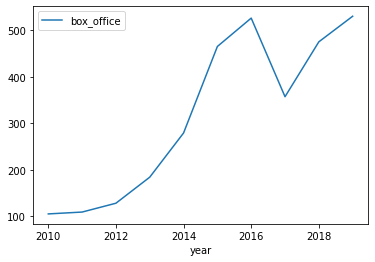

In [25]:
year_table.plot();

Вплоть до 16 года кол-во фильмов плавно росло, но к 17 году упало больше чем на 100 фильмов. Однако после 17 года, количество фильмов вернелось к пиковому значению.

In [26]:
pivot_year_income = df.pivot_table(index='year', values='box_office', aggfunc=['sum'])
pd.options.display.float_format = '{:,.1f}'.format
pivot_year_income

,sum
,box_office
year,
2010,"2,428,654.0"
2011,"14,102,765.0"
2012,"6,955,423.0"
2013,"29,799,706.2"
2014,"7,444,951,859.2"
2015,"39,497,365,196.4"
2016,"47,866,299,741.9"
2017,"48,563,707,217.5"


Видим, что минимальное значение суммарных сборов было достигнуто в 2010 году и составил - 2,428,654.0 руб., максимальное значение было достигнуто в 2018 году и составило - 	49,668,403,134.3 руб.

In [27]:
pivot_year = df.pivot_table(index='year', values='box_office', aggfunc=['mean','median'])
pivot_year['mean_to_median'] = pivot_year['mean']/pivot_year['median']
pivot_year

,mean,median,mean_to_median
,box_office,box_office,
year,,,
2010,"23,130.0","1,700.0",13.6
2011,"129,383.2","3,000.0",43.1
2012,"54,339.2","5,660.0",9.6
2013,"161,954.9","3,522.5",46.0
2014,"26,684,415.3","18,160.0","1,469.4"
2015,"84,940,570.3","4,920,933.0",17.3
2016,"91,000,569.9","3,846,679.4",23.7
2017,"136,032,793.3","9,968,340.0",13.6


Видим наибольше средние значения в 17 и 18 годах, и наименьшие средние значения в 10 и 12 годах. Видим, что средние значения в десятки раз больше медианных. Это означает, что среди сборов есть сильно выделяющиеся значения, которые много больше основной выборки.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

In [28]:
#Объявим функцию, которая выделит значение из возрастного ограничения
def age_restrictor(row):
    age = row['age_restriction']
    if '18+' in age:
        return 18
    if '16+' in age:
        return 16
    if '12+' in age:
        return 12
    if '6+' in age:
        return 6
    if '0+' in age:
        return 0

In [29]:
df['age'] = df.apply(age_restrictor, axis = 1)
rating_data = df.query('year >= 2015 and year <= 2019')

In [30]:
rating_data[['age','box_office']].corr()

,age,box_office
age,1.0,-0.1
box_office,-0.1,1.0


Видим отсутствие зависимости сборов от возрастного ограничения.

In [31]:
display(df.groupby('age')['box_office'].max())

age
0      313,489,846.5
6    2,779,686,144.0
12   3,073,568,690.8
16   2,576,613,776.8
18   1,890,368,076.5
Name: box_office, dtype: float64

Самым большим прокатом отличились фильмы с ограничение 12+.

In [32]:
display(df.groupby(['year','age'])['box_office'].max())

year  age
2010  0         1,446,400.0
      12           45,225.0
      16          168,411.0
      18           31,800.0
2011  0        11,618,085.0
      6               450.0
      12           73,416.0
      16           57,050.0
      18              540.0
2012  0           609,274.0
      6           842,234.0
      12           30,500.0
      16        2,311,220.0
      18           74,100.0
2013  0         1,081,797.0
      6           115,850.0
      12       19,957,031.5
      16          365,353.6
      18        4,321,638.0
2014  0       313,489,846.5
      6       488,223,744.1
      12    1,016,410,635.3
      16      171,633,351.8
      18      963,728,813.5
2015  0       158,025,089.1
      6     1,646,580,645.7
      12    1,658,861,425.5
      16    1,486,131,019.0
      18    1,006,737,153.0
2016  0        64,734,023.5
      6     2,048,126,108.0
      12    1,398,264,684.0
      16    1,570,380,294.0
      18    1,587,516,389.0
2017  0       206,478,186.0
      6   

Картина действительно меняются, и максимальные значения принимают разные возрастные ограничения, возможно это связано с выходящими блокбастерами в разные года.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [33]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,budget_part,age
0,Открытый простор,"221,048,915.0",2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,18
1,Особо важное задание,"111,013,716.0",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN,6
2,Особо опасен,"221,038,416.0",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,18
3,Особо опасен,"221,026,916.0",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,18
4,Особо опасен,"221,030,815.0",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN,18


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [35]:
df[['box_office','ratings']].corr()

,box_office,ratings
box_office,1.0,0.1
ratings,0.1,1.0


Оценили зависимость кассовых сборов от рейтинга фильма. Она отсутствует. Оценим составляющую бюджета фильмов.

In [36]:
budget_df = df[['budget','refundable_support','nonrefundable_support','financing_source','box_office','ratings']]
budget_df = budget_df.dropna()
budget_df.head()

,budget,refundable_support,nonrefundable_support,financing_source,box_office,ratings
1281,"79,411,900.0",0.0,"26,500,000.0",Министерство культуры,"365,353.6",8.1
1498,"176,023,490.0",0.0,"107,847,945.0",Фонд кино,"19,957,031.5",5.3
1524,"40,574,140.0",0.0,"28,000,000.0",Министерство культуры,"55,917.5",4.2
1792,"40,015,122.0",0.0,"25,000,000.0",Министерство культуры,"232,100.0",6.4
1854,"51,850,000.0",0.0,"25,000,000.0",Министерство культуры,"15,078,858.6",6.1


In [37]:
budget_df['budget'] = budget_df['budget']/1000000#избавимся от экспоненциального формата записи

In [38]:
budget_df['box_office'] = budget_df['box_office']/1000000#избавимся от экспоненциального формата записи

In [39]:
budget_df['budget'].describe()

count     301.0
mean      135.8
std       189.2
min         6.0
25%        46.3
50%        77.0
75%       157.2
max     2,305.1
Name: budget, dtype: float64

Средний бюджет фильма 135 миллионов рублей, медиана при этом в два раза меньше - 77 миллионов рублей.

In [40]:
budget_df['support'] = (budget_df['refundable_support'] + budget_df['nonrefundable_support'])/1000000
budget_df['support'].describe()

count   301.0
mean     61.9
std      71.1
min       5.0
25%      26.0
50%      35.0
75%      60.0
max     500.0
Name: support, dtype: float64

В сравнении с общим бюджетом фильмов, из государства выделяется практически половина от средних показателей:
- Среднее - 61 миллион рублей
- Медиана - 35 миллионов рублей

count   301.0
mean      6.0
std       1.1
min       1.0
25%       5.3
50%       6.2
75%       6.7
max       8.5
Name: ratings, dtype: float64

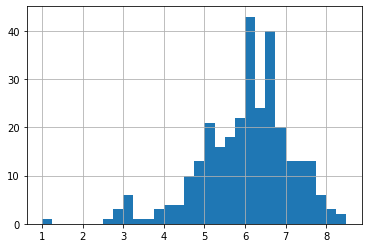

In [41]:
budget_df['ratings'].hist(bins=30)
budget_df['ratings'].describe()

Сравним распределение фильмов не получивших гос помощь.

count   6,490.0
mean        6.5
std         1.1
min         1.0
25%         5.9
50%         6.6
75%         7.2
max         9.2
Name: ratings, dtype: float64

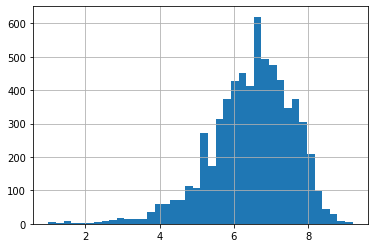

In [42]:
df['ratings'].hist(bins=40)
df['ratings'].describe()

Видим, что значения приблизительно одинаковые, хотя у фильмов получивших гос поддержку результаты похуже:
- Среднее значение меньше на 0,47 балла
- Медиана меньше на 0,4 балла

Оценим окупаемость таких фильмов. Для начала стоит обозначить критерии окупаемости. Согласно википедии примерно 50% с кассовых сборов отходит компаниям кинопроката. Соответственно примем это число за истину. Будем считать отношение половины кассовых сборов к бюджету фильма и присваивать категории соответственно.

In [43]:
#Объявим функцию, которая присвоит категорию "окупаемости" фильму
def payback(row):
    budget = row['budget']
    box_office = row['box_office']/2
    try:
        difference = box_office/budget
    except:
        return 'Отсутствие бюджета'
    if difference < 1:
        return 'Фильм не окупился'
    if (difference >= 1) and (difference < 2):
        return 'Фильм окупился'
    if difference >= 2:
        return 'Фильм хорошо окупился'
    

In [44]:
budget_df['payback'] = budget_df.apply(payback, axis = 1)
budget_df['payback'].value_counts()

Фильм не окупился        263
Фильм окупился            23
Фильм хорошо окупился     15
Name: payback, dtype: int64

Как мы видимо подавляющая часть таких фильмов не окупилась.

### Шаг 5. Напишите общий вывод

Мы провели большое исследование. Оценили наши данные, провели их предобработку: обработали пропуски, неверные типы данных.
Провели анализ данных и получили сделали следующие выводы:
- С 2010 по 2019 год наблюдается увелиение кол-вав фильмов выходящих в прокат,однако в 2017 году наблюдается резкий скачок к уменьшению этого кол-ва. Самый "плодотворный" год - 2019. Так же 2019 оказался и самым прибыльным, относительно других годов. Наибольшие средние значения наблюдаются в 17 и 18 годах, а наименьшие средние значения в 10 и 12 годах.
- Исследовали зависимость кассовых сборов от возрастного ограничения. Выяснили, что она отсутствует, и вопрос относительно самого прибыльного ограничения так же неясен, т.к. картина с годами меняется.

Провели анализ фильмов получивших государственную помощь и пришли к следующим выводам:

- Рейтинг фильма не имеет связи со сборами фильма.
- Говоря о средних значениях гос поддержки составляет практически половину бюджета фильмов.
- Оценили рейтинг фильмов, фильмы получившие гос поддержку показали результаты немного хуже: среднее значение меньше на 0,47 балла, медиана меньше на 0,4 балла
- Так же выяснили, что такие фильмы плохо окупаются из 301 фильма, не окупились 263, а окупились больше чем в 2 раза всего 15 фильмов.